In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
bharu = r"D:\HR Analytics Analysis Project\HR_Analytics.csv"
print(bharu)

D:\HR Analytics Analysis Project\HR_Analytics.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(bharu, na_values = ["", "NA"], keep_default_na = False)
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [5]:
df.shape

(1480, 38)

In [6]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.duplicated().sum()

7

In [8]:
df = df.drop_duplicates(keep = "first").reset_index(drop = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [11]:
def khu(df):
    cat = list(df.columns[df.dtypes == "object"])

    for i in df.columns:
        if i in cat:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)

In [12]:
khu(df)

In [13]:
df.isna().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [14]:
cat = []
con = []

for j in df.columns:
    if df[j].dtype == "object":
        cat.append(j)
    else:
        con.append(j)

In [15]:
cat

['EmpID',
 'AgeGroup',
 'Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'SalarySlab',
 'Over18',
 'OverTime']

In [16]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
import os
a = r"D:\HR Analytics Analysis Project"
os.chdir(a)

In [18]:
df.to_csv("HR Analytics Analysis Dataset Cleaned.csv", index = False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1473 non-null   object 
 1   Age                       1473 non-null   int64  
 2   AgeGroup                  1473 non-null   object 
 3   Attrition                 1473 non-null   object 
 4   BusinessTravel            1473 non-null   object 
 5   DailyRate                 1473 non-null   int64  
 6   Department                1473 non-null   object 
 7   DistanceFromHome          1473 non-null   int64  
 8   Education                 1473 non-null   int64  
 9   EducationField            1473 non-null   object 
 10  EmployeeCount             1473 non-null   int64  
 11  EmployeeNumber            1473 non-null   int64  
 12  EnvironmentSatisfaction   1473 non-null   int64  
 13  Gender                    1473 non-null   object 
 14  HourlyRa

In [20]:
df[cat].describe()

,EmpID,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,Over18,OverTime
count,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473
unique,1470,5,2,4,3,6,2,9,3,4,1,2
top,RM1467,26-35,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Upto 5k,Y,No
freq,2,607,1236,1038,963,606,884,326,675,751,1473,1057


In [21]:
df[con].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,...,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,36.917176,802.659878,9.196877,2.911066,1.0,1026.975560,2.723693,65.833673,2.729803,2.063815,...,2.712152,80.0,0.793618,11.277665,2.800407,2.761711,7.004752,4.228106,2.183978,4.117232
std,9.130690,403.245460,8.107754,1.024612,0.0,603.223162,1.093006,20.350032,0.712115,1.106429,...,1.081575,0.0,0.851493,7.776228,1.289411,0.705838,6.121004,3.621096,3.220301,3.489750
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1024.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1558.000000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
df.groupby(by = ["MaritalStatus"]).count()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,
Divorced,327,327,327,327,327,327,327,327,327,327,...,327,327,327,327,327,327,327,327,327,327
Married,675,675,675,675,675,675,675,675,675,675,...,675,675,675,675,675,675,675,675,675,675
Single,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471


In [23]:
df.groupby("EmpID").mean(numeric_only = True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpID,,,,,,,,,,,,,,,,,,,,,
RM001,41.0,1102.0,1.0,2.0,1.0,1.0,2.0,94.0,3.0,2.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
RM002,49.0,279.0,8.0,1.0,1.0,2.0,3.0,61.0,2.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
RM003,37.0,1373.0,2.0,2.0,1.0,4.0,4.0,92.0,2.0,1.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
RM004,33.0,1392.0,3.0,4.0,1.0,5.0,4.0,56.0,3.0,1.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
RM005,27.0,591.0,2.0,1.0,1.0,7.0,1.0,40.0,3.0,1.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RM995,52.0,322.0,28.0,2.0,1.0,1401.0,4.0,59.0,4.0,4.0,...,2.0,80.0,1.0,24.0,3.0,2.0,5.0,3.0,0.0,2.0
RM996,43.0,930.0,6.0,3.0,1.0,1402.0,1.0,73.0,2.0,2.0,...,1.0,80.0,0.0,20.0,3.0,1.0,20.0,7.0,1.0,8.0
RM997,27.0,205.0,10.0,3.0,1.0,1403.0,4.0,98.0,2.0,2.0,...,4.0,80.0,0.0,6.0,3.0,3.0,6.0,2.0,4.0,4.0


In [24]:
# What is the overall attrition rate in the company?

total_employees = df.shape[0]
attrition_count = df[df["Attrition"] == "Yes"].shape[0]
attrition_rate = (attrition_count/total_employees)*100
print(f"Overall attrition rate in the company:{attrition_rate:.2f}%")

Overall attrition rate in the company:16.09%


Attrition Status Counts:
Attrition
No     1236
Yes     237
Name: count, dtype: int64


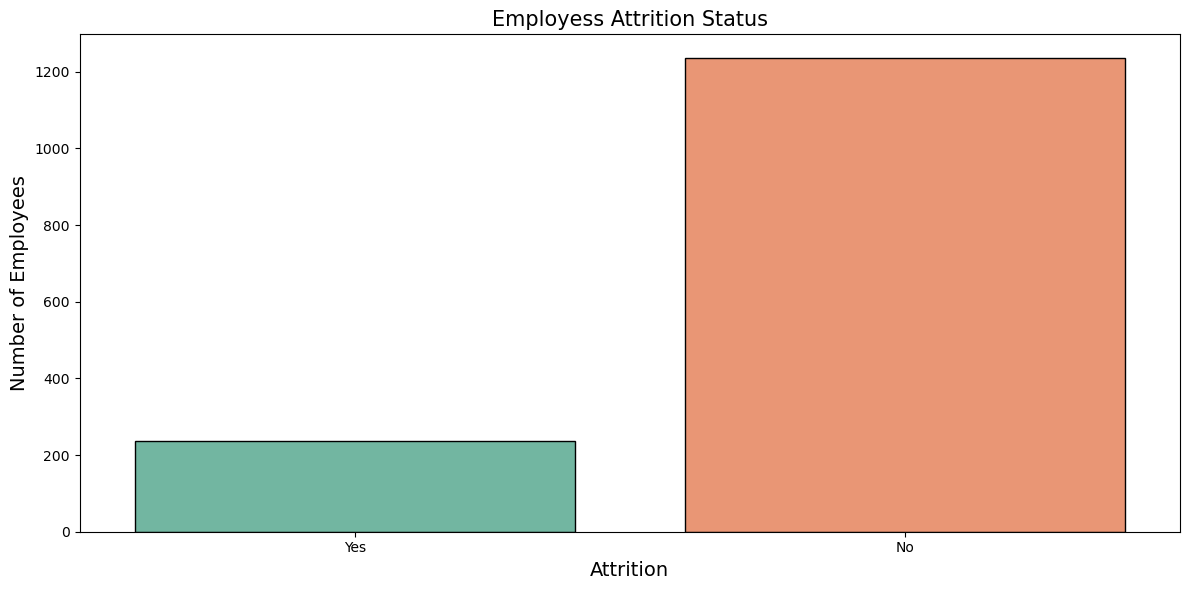

In [25]:
# 1)📊 What is the total number of employees and their attrition status? (Bar chart: Yes vs. No attrition count).

attrition_counts = df["Attrition"].value_counts()
print("Attrition Status Counts:")
print(attrition_counts)
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = "Attrition", palette = "Set2", edgecolor = "black")
plt.title("Employess Attrition Status", fontsize = 15)
plt.xlabel("Attrition", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.tight_layout()
plt.show()

Attrition Rate by Department(%):
Department
Sales                     20.58
Human Resources           19.05
Research & Development    13.81
dtype: float64


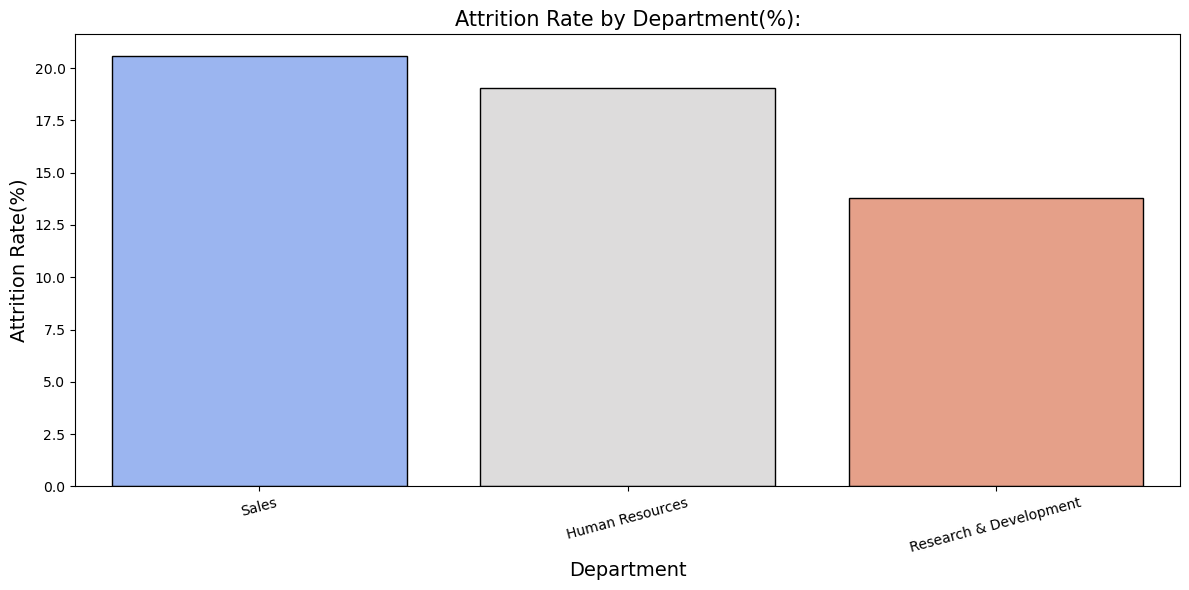

In [26]:
# 2)📊 What is the attrition rate by department? (Bar chart: % attrition per department).

attrition_rate_by_department = df[df["Attrition"] == "Yes"].groupby("Department").size()/df.groupby("Department").size()*100
attrition_rate_by_department = attrition_rate_by_department.sort_values(ascending = False)
print("Attrition Rate by Department(%):")
print(attrition_rate_by_department.round(2))
plt.figure(figsize = (12, 6))
sns.barplot(x = attrition_rate_by_department.index, y = attrition_rate_by_department.values, palette = "coolwarm", edgecolor = "black")
plt.title("Attrition Rate by Department(%):", fontsize = 15)
plt.xlabel("Department", fontsize = 14)
plt.ylabel("Attrition Rate(%)", fontsize = 14)
plt.xticks(rotation = 15)
plt.tight_layout()
plt.show()

Number of Employee in Each Department:
Department
Research & Development    963
Sales                     447
Human Resources            63
Name: count, dtype: int64


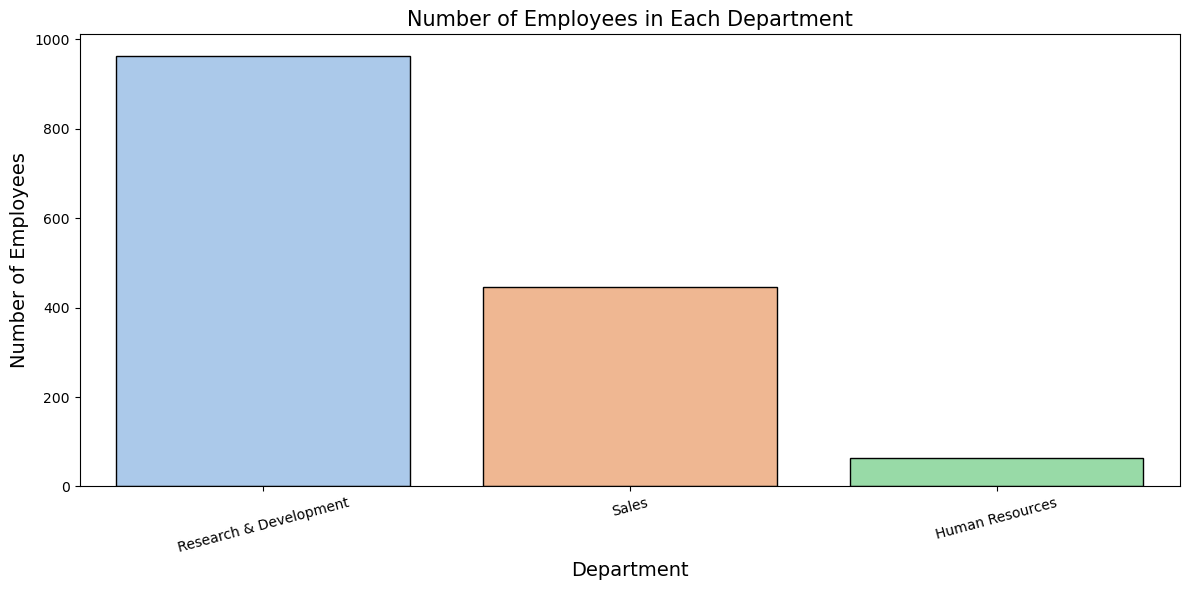

In [27]:
# 3)📊 How many employees are in each department? (Bar chart).

department_counts = df["Department"].value_counts()
print("Number of Employee in Each Department:")
print(department_counts)
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = "Department", order = department_counts.index, palette = "pastel", edgecolor = "black")
plt.title("Number of Employees in Each Department", fontsize = 15)
plt.xlabel("Department", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.xticks(rotation = 15)
plt.tight_layout()
plt.show()

Gender Distribution:
Gender
Male      884
Female    589
Name: count, dtype: int64


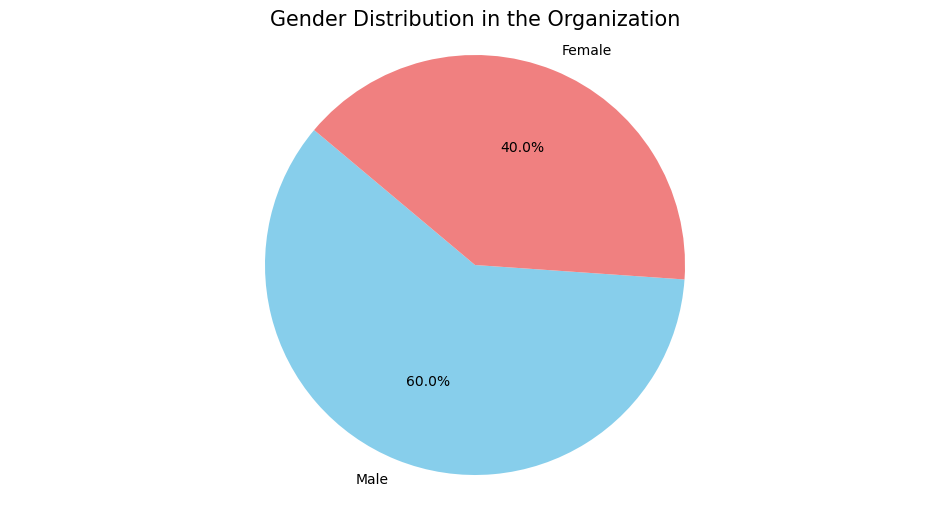

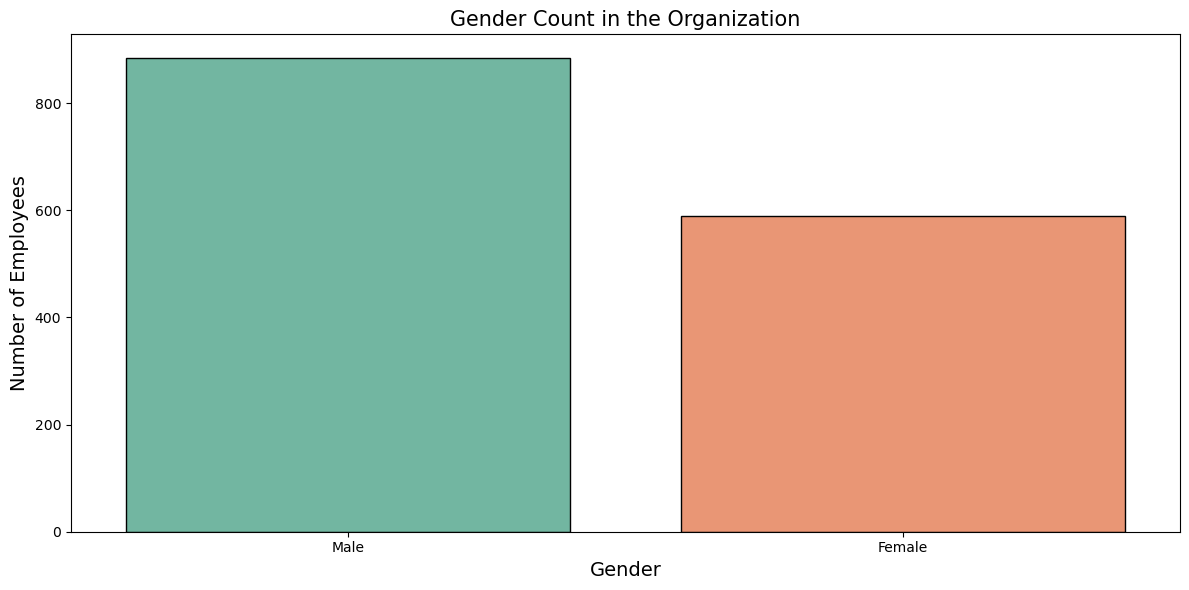

In [28]:
# 4)📊 What is the gender distribution across the organization? (Pie or bar chart).

gender_counts = df["Gender"].value_counts()
print("Gender Distribution:")
print(gender_counts)
plt.figure(figsize = (12, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct = "%1.1f%%", colors = ["skyblue", "lightcoral"], startangle = 140)
plt.title("Gender Distribution in the Organization", fontsize = 15)
plt.axis("equal")
plt.show()

plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = "Gender", palette = "Set2", edgecolor = "black")
plt.title("Gender Count in the Organization", fontsize = 15)
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.tight_layout()
plt.show()

Employee Distribution by Education Fields
EducationField
Life Sciences       606
Medical             466
Marketing           159
Technical Degree    132
Other                83
Human Resources      27
Name: count, dtype: int64


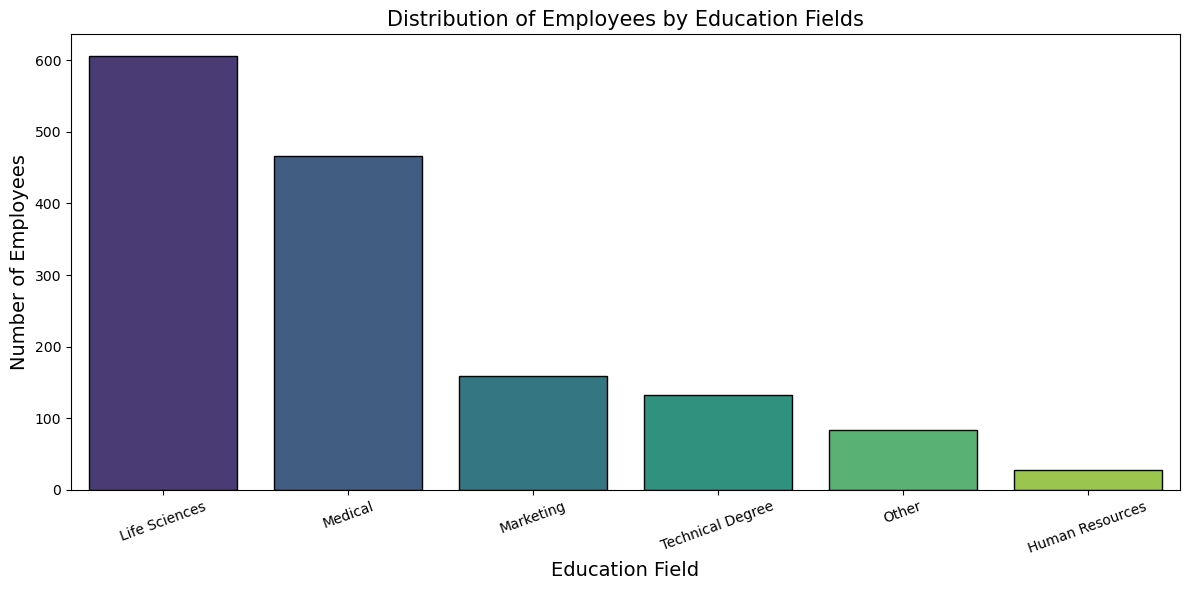

In [29]:
# 5)📊 What is the distribution of employees across different education fields? (Bar chart).

education_field_counts = df["EducationField"].value_counts()
print("Employee Distribution by Education Fields")
print(education_field_counts)
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = "EducationField", order = education_field_counts.index, palette = "viridis", edgecolor = "black")
plt.title("Distribution of Employees by Education Fields", fontsize = 15)
plt.xlabel("Education Field", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()

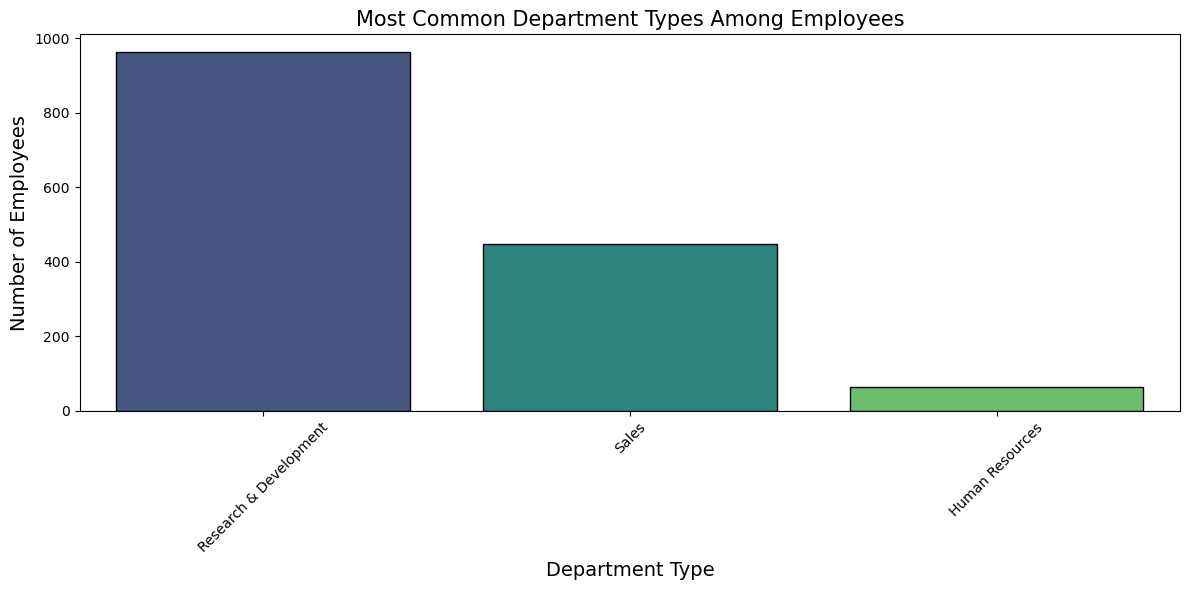

In [30]:
# 6)📊 What are the most common Department types among employees? (Bar chart).

travel_counts = df["Department"].value_counts()
plt.figure(figsize = (12, 6))
sns.barplot(x = travel_counts.index, y = travel_counts.values, palette = "viridis", edgecolor = "black")
plt.title("Most Common Department Types Among Employees", fontsize = 15)
plt.xlabel("Department Type", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

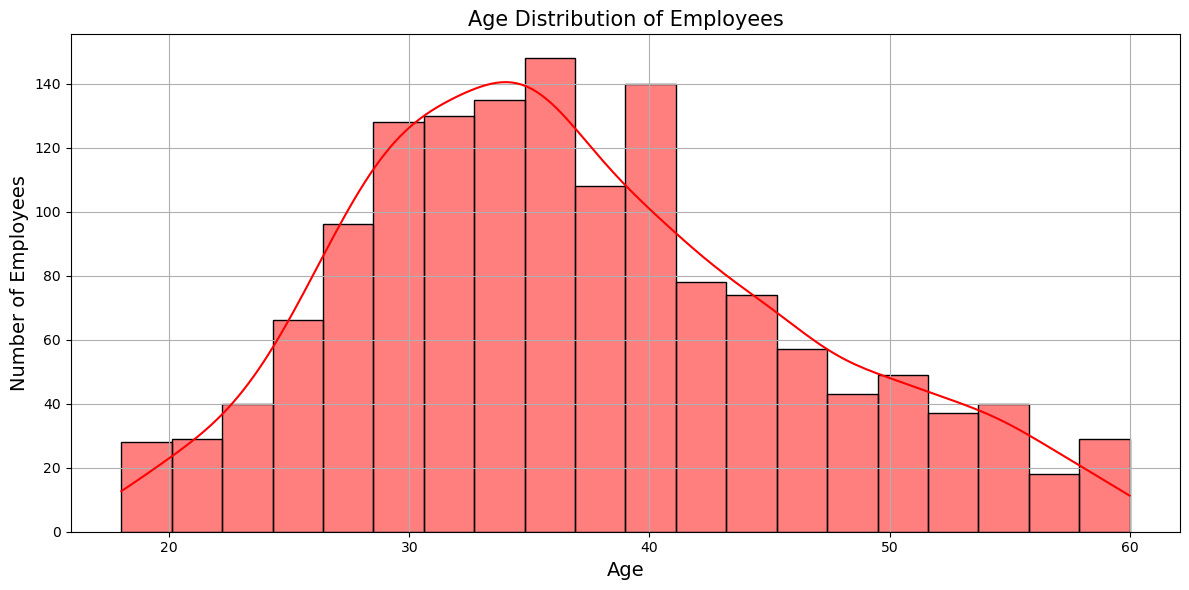

In [31]:
# 7)📊 What is the age distribution of employees? (Histogram or KDE plot).

plt.figure(figsize = (12, 6))
sns.histplot(df["Age"], kde = True, bins = 20, color = "red", edgecolor = "black")
plt.title("Age Distribution of Employees", fontsize = 15)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.show()

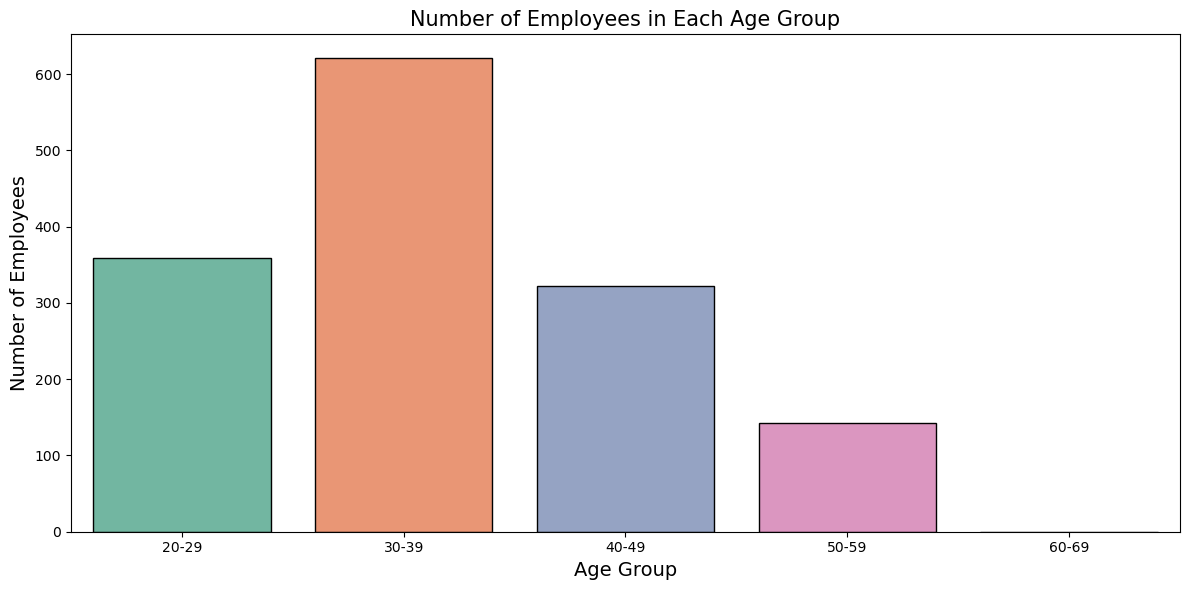

In [32]:
# 8)📊 How many employees are in each age group bucket? (Bar chart: age bins).

age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ["20-29", "30-39", "40-49", "50-59", "60-69"]
df["Age Group"] = pd.cut(df["Age"], bins = age_bins, labels = age_labels)
age_group_counts = df["Age Group"].value_counts().sort_index()
plt.figure(figsize = (12, 6))
sns.barplot(x = age_group_counts.index, y = age_group_counts.values, palette = "Set2", edgecolor = "black")
plt.title("Number of Employees in Each Age Group", fontsize = 15)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.tight_layout()
plt.show()

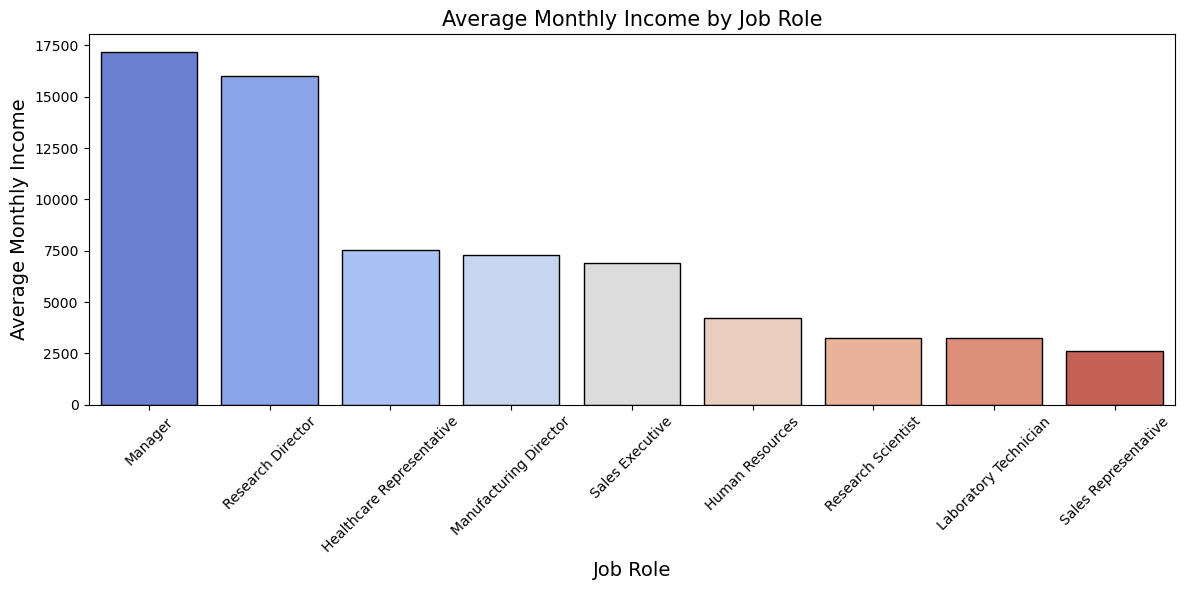

In [33]:
# 9)📊 What is the average monthly income by job role or department? (Box plot or bar chart).

income_by_role = df.groupby("JobRole")["MonthlyIncome"].mean().sort_values(ascending = False)
plt.figure(figsize = (12, 6))
sns.barplot(x = income_by_role.index, y = income_by_role.values, palette = "coolwarm", edgecolor = "black")
plt.title("Average Monthly Income by Job Role", fontsize = 15)
plt.xlabel("Job Role", fontsize = 14)
plt.ylabel("Average Monthly Income", fontsize = 14)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

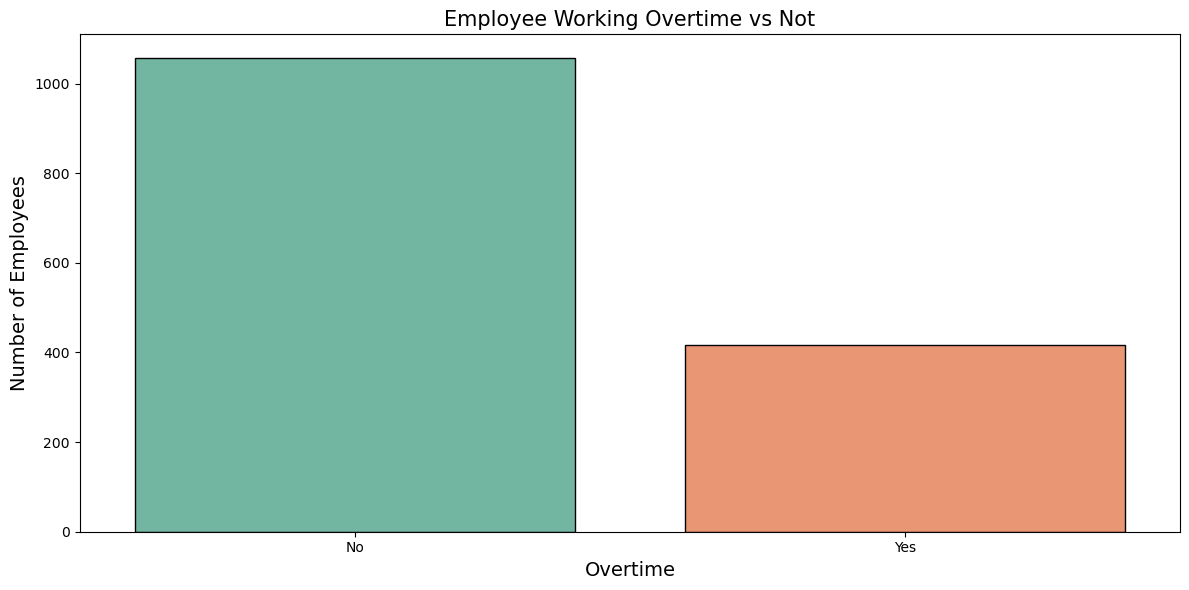

In [34]:
# 10)📊 How many employees work overtime vs. don’t? (Bar chart).

overtime_counts = df["OverTime"].value_counts()
plt.figure(figsize = (12, 6))
sns.barplot(x = overtime_counts.index, y = overtime_counts.values, palette = "Set2", edgecolor = "black")
plt.title("Employee Working Overtime vs Not", fontsize = 15)
plt.xlabel("Overtime", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.tight_layout()
plt.show()

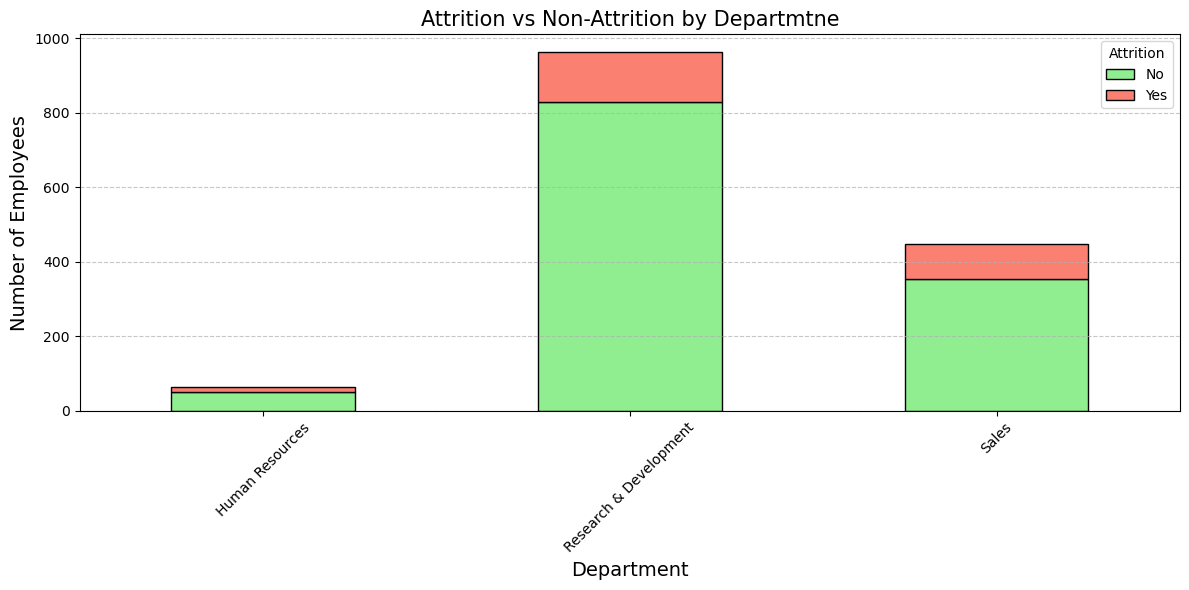

In [35]:
# 11)📊 Visualize the attrition rate by department using a stacked bar chart to compare attrition vs. non-attrition counts.

dept_attrition = df.groupby(["Department", "Attrition"]).size().unstack()
dept_attrition.plot(kind = "bar", stacked = True, figsize = (12, 6), color = ["lightgreen", "salmon"], edgecolor = "black")
plt.title("Attrition vs Non-Attrition by Departmtne", fontsize = 15)
plt.xlabel("Department", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.legend(title = "Attrition", fontsize = 10)
plt.xticks(rotation = 45)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

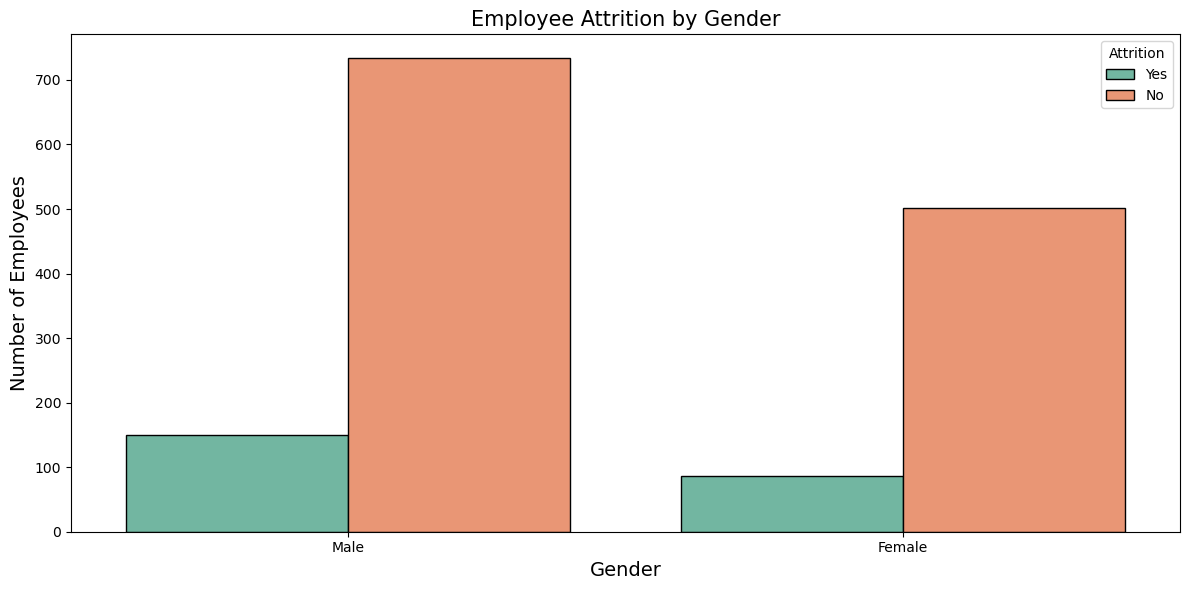

In [36]:
# 12)📊 Compare attrition rates by gender using a grouped countplot to show differences in employee exit rates.

if "Attrition" in df.columns and "Gender" in df.columns:
    plt.figure(figsize = (12, 6))
    sns.countplot(data = df, x = "Gender", hue = "Attrition", palette = "Set2", edgecolor = "black")
    plt.title("Employee Attrition by Gender", fontsize = 15)
    plt.xlabel("Gender", fontsize = 14)
    plt.ylabel("Number of Employees", fontsize = 14)
    plt.legend(title = "Attrition", fontsize = 10)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Attrition' and \ or 'Gender' not found in the DataFrame.")

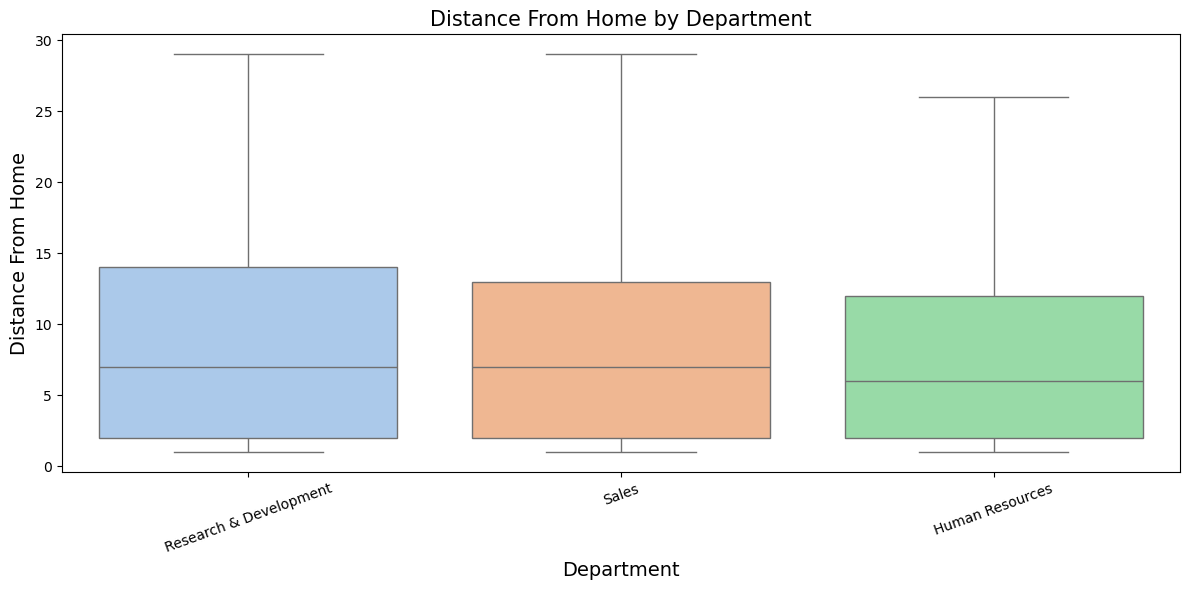

In [37]:
# 13)📊 What is the average distance from home by department? Use a boxplot to visualize the spread.

if "DistanceFromHome" in df.columns and "Department" in df.columns:
    plt.figure(figsize = (12, 6))
    sns.boxplot(data = df, x = "Department", y = "DistanceFromHome", palette = "pastel")
    plt.title("Distance From Home by Department", fontsize = 15)
    plt.xlabel("Department", fontsize = 14)
    plt.ylabel("Distance From Home", fontsize = 14)
    plt.xticks(rotation = 20)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'DistanceFromHome' and/or 'Department' not found in the DataFrame")

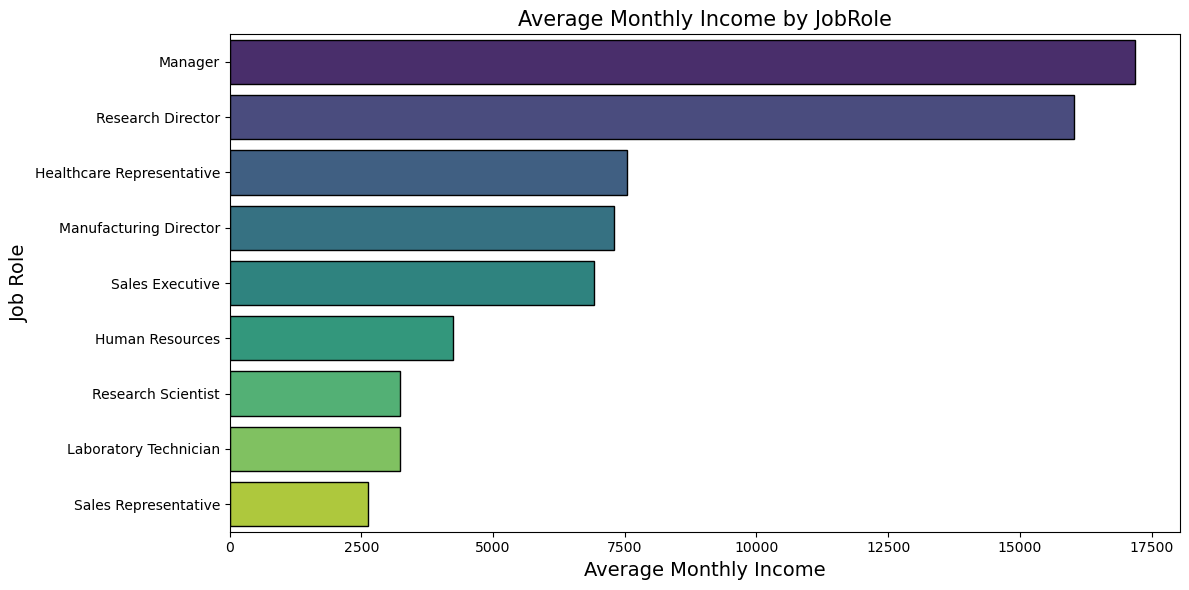

In [38]:
# 14)📊 Which job roles have the highest average monthly income? Use a sorted bar chart to show descending order.

if "JobRole" in df.columns and "MonthlyIncome" in df.columns:
    avg_income = df.groupby("JobRole")["MonthlyIncome"].mean().sort_values(ascending = False).reset_index()
    plt.figure(figsize = (12, 6))
    sns.barplot(data = avg_income, x = "MonthlyIncome", y = "JobRole", palette = "viridis", edgecolor = "black")
    plt.title("Average Monthly Income by JobRole", fontsize = 15)
    plt.xlabel("Average Monthly Income", fontsize = 14)
    plt.ylabel("Job Role", fontsize = 14)
    plt.tight_layout()
    plt.show()
else:
    print("Required Columns 'JobRole' and/or 'MonthlyIncome' not found in the DataFrame")

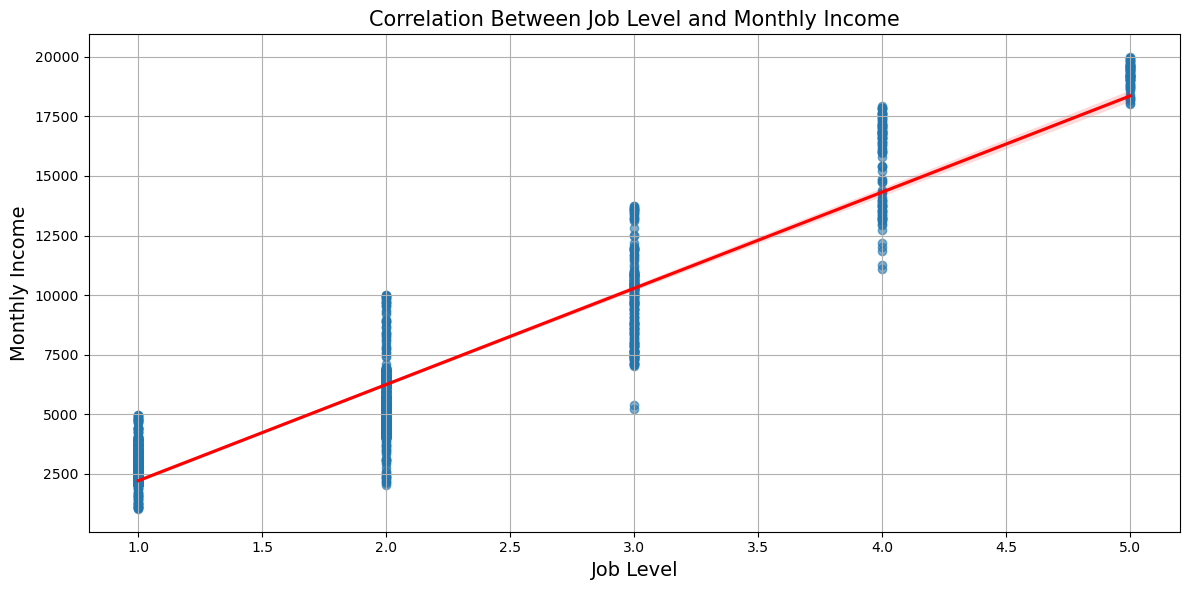

In [39]:
# 15)📈 What is the correlation between job level and monthly income? Use a regression plot (regplot) for trend analysis.

if "JobLevel" in df.columns and "MonthlyIncome" in df.columns:
    plt.figure(figsize = (12, 6))
    sns.regplot(data = df, x = "JobLevel", y = "MonthlyIncome", scatter_kws = {"alpha":0.6}, line_kws = {"color":"red"})
    plt.title("Correlation Between Job Level and Monthly Income", fontsize = 15)
    plt.xlabel("Job Level", fontsize = 14)
    plt.ylabel("Monthly Income", fontsize = 14)
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("Required Columns 'JobLevel' and/or 'MonthlyIncome' not found in the DataFrame")

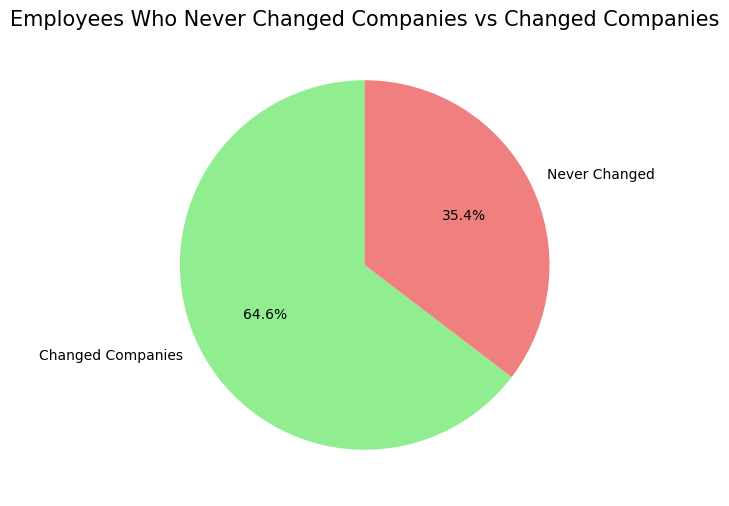

In [40]:
# 16)📊 How many employees have never changed companies (NumCompaniesWorked = 1)? Display using a pie chart.

df["CompanyChangeStatus"] = df["NumCompaniesWorked"].apply(lambda x:"Never Changed" if x == 1 else "Changed Companies")
status_counts = df["CompanyChangeStatus"].value_counts()
plt.figure(figsize = (12, 6))
plt.pie(status_counts, labels = status_counts.index, autopct = "%1.1f%%", colors = ["lightgreen", "lightcoral"], startangle = 90)
plt.title("Employees Who Never Changed Companies vs Changed Companies", fontsize = 15)
plt.show()

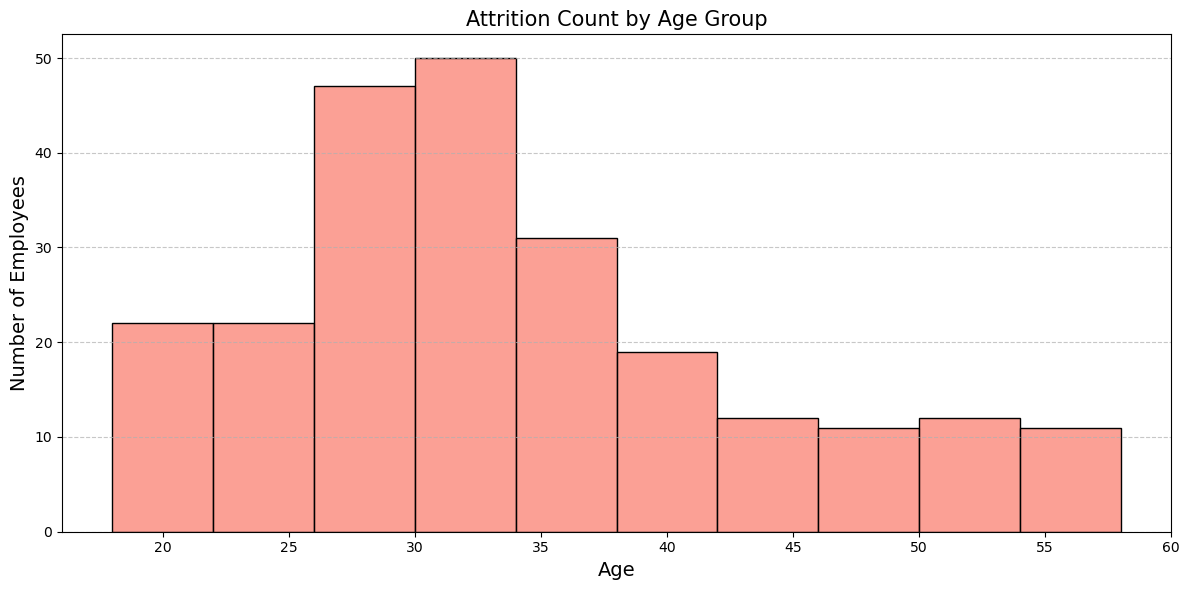

In [41]:
# 17)📊 Which age group has the highest attrition? Use a histplot with bins to display frequency by age.

attrition_yes = df[df["Attrition"] == "Yes"]
plt.figure(figsize = (12, 6))
sns.histplot(data = attrition_yes, x = "Age", bins = 10, kde = False, color = "salmon", edgecolor = "black")
plt.title("Attrition Count by Age Group", fontsize = 15)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

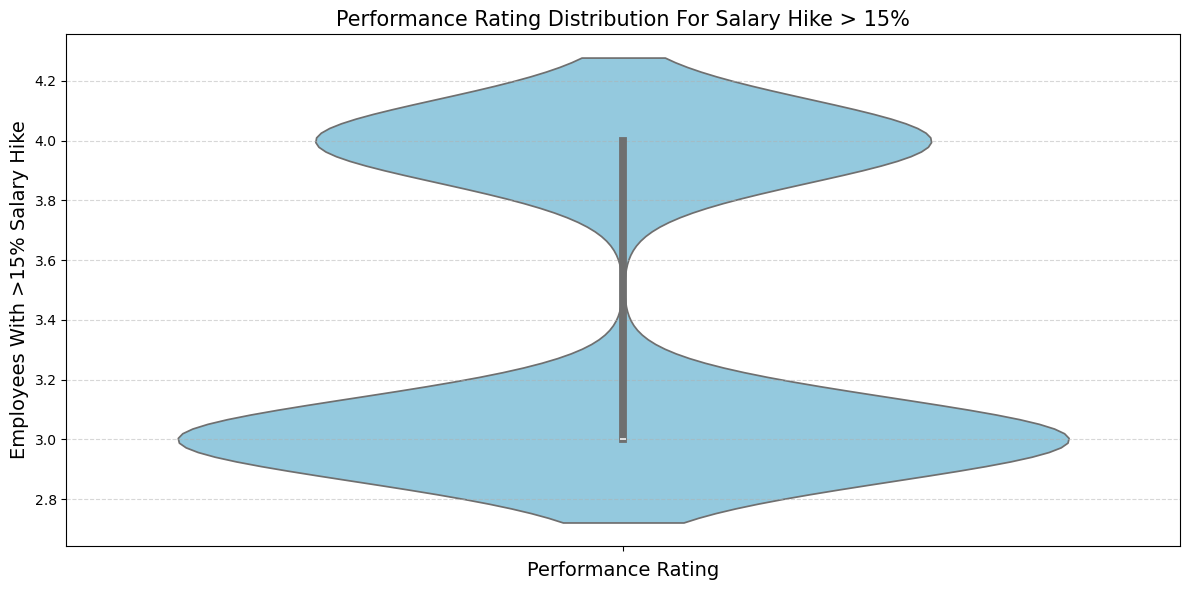

Average Performance Rating(Salary Hike > 15%):3.41


In [42]:
# 18)📊 What is the average performance rating for those with a salary hike > 15%? Use a violin plot for visual comparison.

high_hike = df[df["PercentSalaryHike"]>15]
plt.figure(figsize = (12, 6))
sns.violinplot(data = high_hike, y = "PerformanceRating", inner = "box", color = "skyblue")
plt.title("Performance Rating Distribution For Salary Hike > 15%", fontsize = 15)
plt.xlabel("Performance Rating", fontsize = 14)
plt.ylabel("Employees With >15% Salary Hike", fontsize = 14)
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)
plt.tight_layout()
plt.show()
average_rating = high_hike["PerformanceRating"].mean()
print(f"Average Performance Rating(Salary Hike > 15%):{average_rating:.2f}")

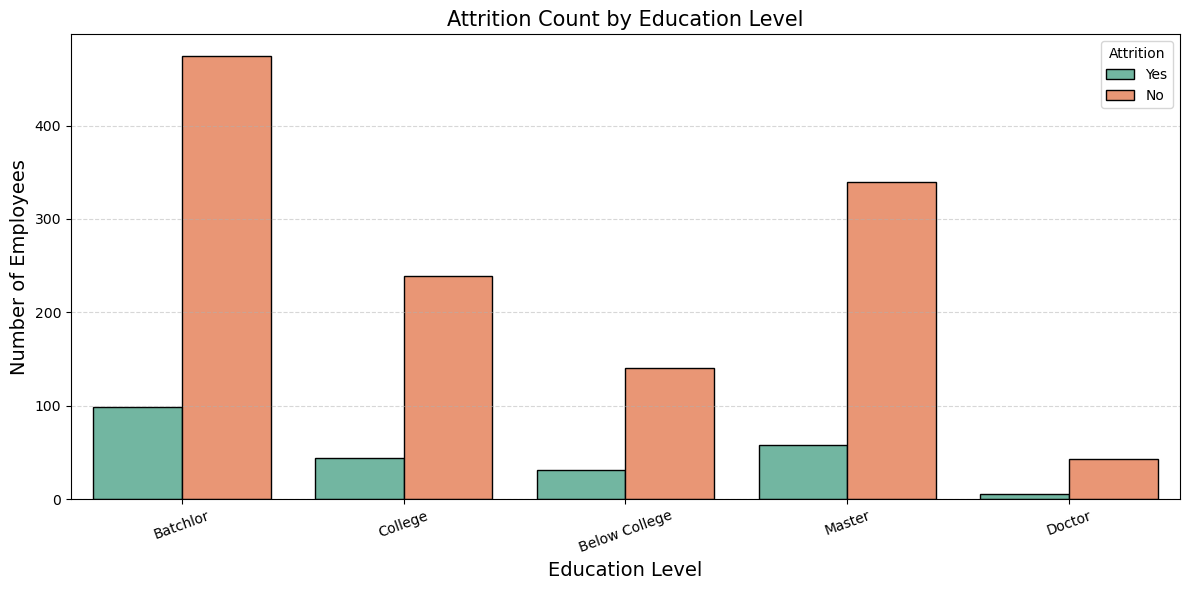

In [43]:
# 19)📊 How does education level relate to attrition? Use a grouped bar chart by education level and attrition.

education_map = {
    1:"Below College",
    2:"College",
    3:"Batchlor",
    4:"Master",
    5:"Doctor"
}
df["EducationLevel"] = df["Education"].map(education_map)
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = "EducationLevel", hue = "Attrition", palette = "Set2", edgecolor = "black")
plt.title("Attrition Count by Education Level", fontsize = 15)
plt.xlabel("Education Level", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)
plt.legend(title = "Attrition", fontsize = 10)
plt.xticks(rotation = 20)
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)
plt.tight_layout()
plt.show()

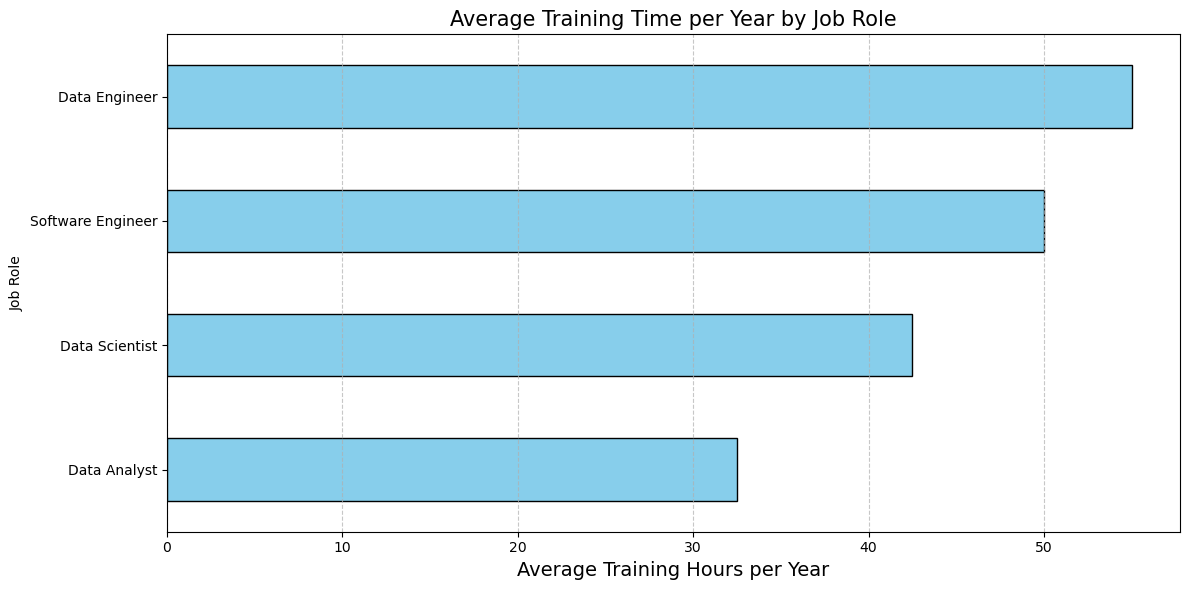

In [44]:
# 20)📊 What is the average training time per year by job role? Use a horizontal bar chart to show comparisons.

data = {
    "Job Role":["Data Scientist", "Data Analyst", "Software Engineer", "Data Analyst", "Data Scientist", "Data Engineer"],
    "Training Hours per Year":[40, 30, 50, 35, 45, 55]
}
df = pd.DataFrame(data)
avg_training = df.groupby("Job Role")["Training Hours per Year"].mean().sort_values()
plt.figure(figsize = (12, 6))
avg_training.plot(kind = "barh", color = "skyblue", edgecolor = "black")
plt.title("Average Training Time per Year by Job Role", fontsize = 15)
plt.xlabel("Average Training Hours per Year", fontsize = 14)
plt.grid(axis = "x", linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

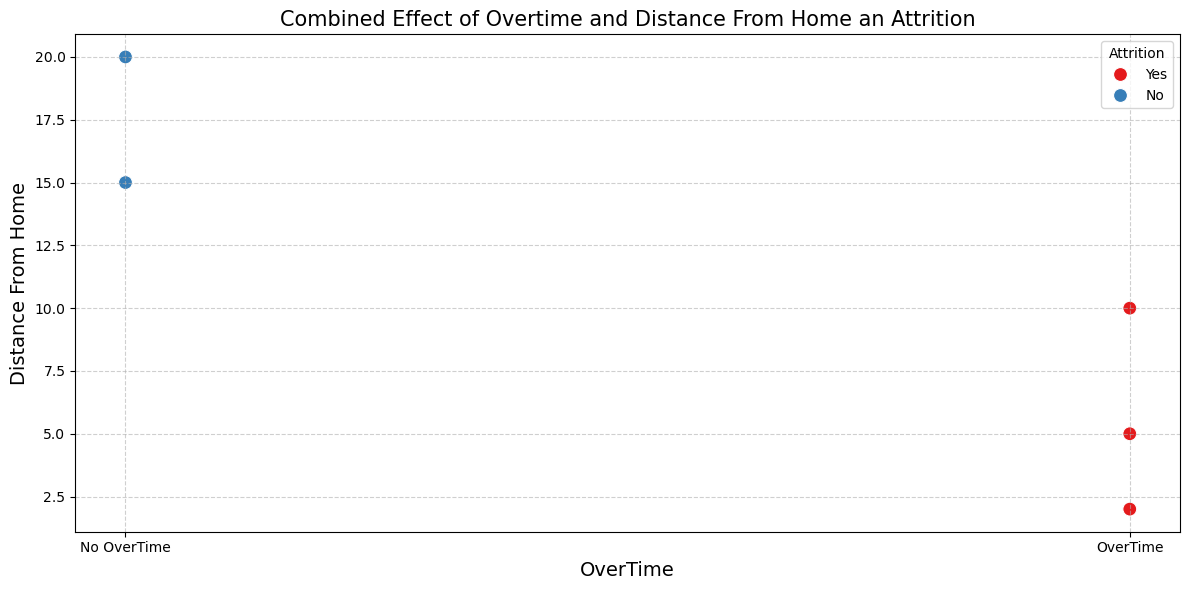

In [45]:
# 21)📈 What is the combined effect of overtime and distance from home on attrition? Use a scatter plot with hue = 'Attrition'.

df = pd.DataFrame({
    "OverTime":["Yes", "No", "Yes", "No", "Yes"],
    "DistanceFromHome":[2, 15, 5, 20, 10],
    "Attrition":["Yes", "No", "Yes", "No", "Yes"]
})
df["OverTime_Flag"] = df["OverTime"].map({"Yes":1, "No":0})
plt.figure(figsize = (12, 6))
sns.scatterplot(
    data = df,
    x = "OverTime_Flag",
    y = "DistanceFromHome",
    hue = "Attrition",
    palette = "Set1",
    s = 100
)
plt.xticks([0, 1], ["No OverTime", "OverTime"])
plt.xlabel("OverTime", fontsize = 14)
plt.ylabel("Distance From Home", fontsize = 14)
plt.title("Combined Effect of Overtime and Distance From Home an Attrition", fontsize = 15)
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.tight_layout()
plt.show()

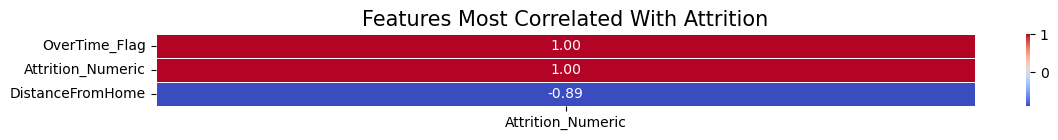

In [46]:
# 22)📊 Which features are most correlated with attrition? Display using a correlation heatmap.

df["Attrition_Numeric"] = df["Attrition"].map({"Yes":1, "No":0})
numeric_df = df.select_dtypes(include = "number")
correlation_matrix = numeric_df.corr()
attrition_corr = correlation_matrix[["Attrition_Numeric"]].sort_values(by = "Attrition_Numeric", ascending = False)
top_features = attrition_corr[abs(attrition_corr["Attrition_Numeric"])>0.1]
plt.figure(figsize = (12, len(top_features)*0.5))
sns.heatmap(top_features, annot = True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5, edgecolor = "black")
plt.title("Features Most Correlated With Attrition", fontsize = 15)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

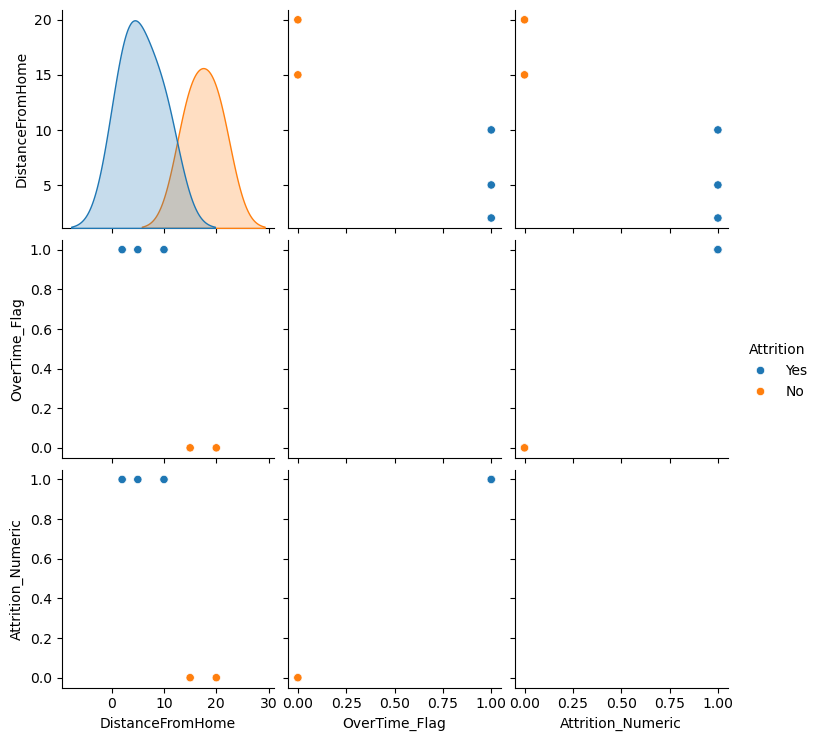

In [47]:
plt.figure(figsize = (12, 6))
sns.pairplot(data = df, hue = "Attrition")

In [48]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [49]:
from ydata_profiling import ProfileReport

In [50]:
profile = ProfileReport(df, title = "HR Analytics Analysis Project Report")

In [51]:
import os
df = r"D:\HR Analytics Analysis Project"
os.chdir(df)

In [52]:
profile.to_file("HR Analytics Analysis Project Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]